In [ ]:
import mdtraj as md
import numpy as np
import os
import json
from tqdm import tqdm
from itertools import combinations
import glob
def calculate_rmsd(pdb1, pdb2):
    # 读取PDB文件
    traj1 = md.load(pdb1)
    traj2 = md.load(pdb2)
    
    # 如果只有一个帧，仍然可以计算RMSD
    if traj1.n_frames == 1 and traj2.n_frames == 1:
        rmsd = md.rmsd(traj1, traj2, 0)  # 计算第0帧的RMSD
        return rmsd[0]  # 返回RMSD值
    else:
        # 如果有多帧（比如分子动力学轨迹），可以选择其他计算方式
        print(f"Warning: The PDB files contain more than one frame. This is unusual for static structures.")
        return None  # 可以根据需要修改处理方式
def calculate_average_rmsd(pdb_files):
    rmsd_values = []
    
    # 对所有PDB文件计算成对RMSD
    for (pdb1, pdb2) in tqdm(combinations(pdb_files, 2)):
        rmsd = calculate_rmsd(pdb1, pdb2)
        rmsd_values.append(rmsd)
    
    # 计算平均RMSD
    average_rmsd = np.mean(rmsd_values)
    return average_rmsd
def main():
    # 假设PDB文件位于当前目录下的'./pdbs'文件夹中
    pdb_dir = '/root/autodl-tmp/PP_generate_v1/data/downloads/result'
    # pdb_dir = '/root/autodl-tmp/PP_generate_v1/data/PPDbench'
    json_file = '/root/autodl-tmp/PP_generate_v1/data/result/peptides_vina.json'
    # 读取已有的 JSON 文件
    with open(json_file, 'r') as f:
        data = json.load(f)
    ligand_pdb = []
    # 遍历每个蛋白 ID
    for protein_id in tqdm(data.keys(), desc="Processing proteins"):
        # ligand_pdb_file = os.path.join(pdb_dir, f"{protein_id}/peptide.pdb")
        ligand_pdb_file = os.path.join(pdb_dir, f"{protein_id}_unrelaxed_rank_001*.pdb")
        ligand_files = glob.glob(ligand_pdb_file)
        ligand_pdb_file = ligand_files[0]
        ligand_pdb.append(ligand_pdb_file)
    # 计算多肽群体的平均RMSD
    average_rmsd = calculate_average_rmsd(ligand_pdb)
    print(f'多肽群体的平均RMSD: {average_rmsd}')

if __name__ == '__main__':
    main()


In [ ]:
import mdtraj as md
import numpy as np
import os
import json
from tqdm import tqdm
from itertools import combinations
import glob
import subprocess
'''
计算我的生成多肽之间的平均TM-score
'''
def calculate_tm_score(pdb1, pdb2):
    """
    使用 TM-align 计算两个PDB文件之间的TM-score
    """
    # 调用 TM-align 工具，确保 TM-align 已经安装并可用
    cmd = f"/root/autodl-tmp/PP_generate_v1/data/downloads/TMalign {pdb1} {pdb2}"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    
    # 从 TM-align 输出中提取 TM-score
    for line in result.stdout.splitlines():
        if "TM-score" in line:
            tm_score = float(line.split()[1])
            return tm_score
    return None  # 如果无法提取TM-score，则返回None

def calculate_average_tm_score(pdb_files):
    """
    计算所有多肽之间的平均TM-score
    """
    tm_scores = []
    
    # 对所有PDB文件计算成对TM-score
    for (pdb1, pdb2) in tqdm(combinations(pdb_files, 2), desc="Calculating TM-scores"):
        tm_score = calculate_tm_score(pdb1, pdb2)
        if tm_score is not None:
            tm_scores.append(tm_score)
    
    # 计算平均TM-score
    average_tm_score = np.mean(tm_scores) if tm_scores else 0
    return average_tm_score

def main():
    # 假设PDB文件位于指定目录
    pdb_dir = '/root/autodl-tmp/peptides2'
    json_file = '/root/autodl-tmp/PP_generate_v1/data/SOTA/peptides_sota.json'
    
    # 读取已有的 JSON 文件
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    ligand_pdb = []
    
    # 遍历每个蛋白 ID，获取对应的PDB文件
    for protein_id in tqdm(data.keys(), desc="Processing proteins"):
        ligand_pdb_file = os.path.join(pdb_dir, f"{protein_id}.pdb")
        ligand_files = glob.glob(ligand_pdb_file)
        if ligand_files:
            ligand_pdb.append(ligand_files[0])  # 假设每个蛋白只会有一个文件匹配
    
    # 计算多肽群体的平均TM-score
    average_tm_score = calculate_average_tm_score(ligand_pdb)
    print(f'多肽群体的平均TM-score: {average_tm_score:.4f}')

if __name__ == '__main__':
    main()


Processing proteins: 100%|██████████| 133/133 [00:00<00:00, 49331.66it/s]
Calculating TM-scores: 8778it [00:47, 183.81it/s]

多肽群体的平均TM-score: 0.3004


In [1]:
import mdtraj as md
import numpy as np
import os
import json
from tqdm import tqdm
from itertools import combinations
import glob
import subprocess
'''
计算ppflow生成多肽之间的平均TM-score
'''
def calculate_tm_score(pdb1, pdb2):
    """
    使用 TM-align 计算两个PDB文件之间的TM-score
    """
    # 调用 TM-align 工具，确保 TM-align 已经安装并可用
    cmd = f"/root/autodl-tmp/PP_generate_v1/data/downloads/TMalign {pdb1} {pdb2}"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    
    # 从 TM-align 输出中提取 TM-score
    for line in result.stdout.splitlines():
        if "TM-score" in line:
            tm_score = float(line.split()[1])
            return tm_score
    return None  # 如果无法提取TM-score，则返回None

def calculate_average_tm_score(pdb_files):
    """
    计算所有多肽之间的平均TM-score
    """
    tm_scores = []
    
    # 对所有PDB文件计算成对TM-score
    for (pdb1, pdb2) in tqdm(combinations(pdb_files, 2), desc="Calculating TM-scores"):
        tm_score = calculate_tm_score(pdb1, pdb2)
        if tm_score is not None:
            tm_scores.append(tm_score)
    
    # 计算平均TM-score
    average_tm_score = np.mean(tm_scores) if tm_scores else 0
    return average_tm_score

def main():
    # 假设PDB文件位于指定目录
    pdb_dir = '/root/autodl-tmp/ppflow1'
    json_file = '/root/autodl-tmp/PP_generate_v1/data/result/peptides_vina.json'
    
    # 读取已有的 JSON 文件
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    ligand_pdb = []
    
    # 遍历每个蛋白 ID，获取对应的PDB文件
    for protein_id in tqdm(data.keys(), desc="Processing proteins"):
        ligand_pdb_file = os.path.join(pdb_dir, f"{protein_id}/0000.pdb")
        ligand_files = glob.glob(ligand_pdb_file)
        if ligand_files:
            ligand_pdb.append(ligand_files[0])  # 假设每个蛋白只会有一个文件匹配
    
    # 计算多肽群体的平均TM-score
    average_tm_score = calculate_average_tm_score(ligand_pdb)
    print(f'多肽群体的平均TM-score: {average_tm_score:.4f}')

if __name__ == '__main__':
    main()


Processing proteins: 100%|██████████| 133/133 [00:00<00:00, 90163.64it/s]
Calculating TM-scores: 8778it [00:39, 220.47it/s]

多肽群体的平均TM-score: 0.2316


In [2]:
import mdtraj as md
import numpy as np
import os
import json
from tqdm import tqdm
from itertools import combinations
import glob
import subprocess
'''
计算RFdiffusion生成多肽之间的平均TM-score
'''
def calculate_tm_score(pdb1, pdb2):
    """
    使用 TM-align 计算两个PDB文件之间的TM-score
    """
    # 调用 TM-align 工具，确保 TM-align 已经安装并可用
    cmd = f"/root/autodl-tmp/PP_generate_v1/data/downloads/TMalign {pdb1} {pdb2}"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    
    # 从 TM-align 输出中提取 TM-score
    for line in result.stdout.splitlines():
        if "TM-score" in line:
            tm_score = float(line.split()[1])
            return tm_score
    return None  # 如果无法提取TM-score，则返回None

def calculate_average_tm_score(pdb_files):
    """
    计算所有多肽之间的平均TM-score
    """
    tm_scores = []
    
    # 对所有PDB文件计算成对TM-score
    for (pdb1, pdb2) in tqdm(combinations(pdb_files, 2), desc="Calculating TM-scores"):
        tm_score = calculate_tm_score(pdb1, pdb2)
        if tm_score is not None:
            tm_scores.append(tm_score)
    
    # 计算平均TM-score
    average_tm_score = np.mean(tm_scores) if tm_scores else 0
    return average_tm_score

def main():
    # 假设PDB文件位于指定目录
    pdb_dir = '/root/autodl-tmp/PP_generate_v1/data/downloads/pep_outputs'
    json_file = '/root/autodl-tmp/PP_generate_v1/data/result/peptides_vina.json'
    
    # 读取已有的 JSON 文件
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    ligand_pdb = []
    
    # 遍历每个蛋白 ID，获取对应的PDB文件
    for protein_id in tqdm(data.keys(), desc="Processing proteins"):
        ligand_pdb_file = os.path.join(pdb_dir, f"*_{protein_id}_flexible_peptide_0.pdb")
        ligand_files = glob.glob(ligand_pdb_file)
        if ligand_files:
            ligand_pdb.append(ligand_files[0])  # 假设每个蛋白只会有一个文件匹配
    
    # 计算多肽群体的平均TM-score
    average_tm_score = calculate_average_tm_score(ligand_pdb)
    print(f'多肽群体的平均TM-score: {average_tm_score:.4f}')

if __name__ == '__main__':
    main()


Processing proteins: 100%|██████████| 133/133 [00:00<00:00, 1525.53it/s]
Calculating TM-scores: 8778it [00:13, 638.70it/s]

多肽群体的平均TM-score: 0.6949


In [ ]:
#!/usr/bin/env python
"""
Peptide similarity analysis & visualization
-------------------------------------------
需要第三方库: biopython, pandas, matplotlib
安装示例：
    pip install biopython pandas matplotlib
"""

import json
import glob
import os
from collections import defaultdict
from typing import Dict, List

import pandas as pd
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, PPBuilder
from Bio import pairwise2

# ---------- 工具函数 ----------------------------------------------------------

# 常见 20 个氨基酸 + 非标准的一些补充
THREE_TO_ONE = {
    "ALA": "A", "ARG": "R", "ASN": "N", "ASP": "D", "CYS": "C",
    "GLN": "Q", "GLU": "E", "GLY": "G", "HIS": "H", "ILE": "I",
    "LEU": "L", "LYS": "K", "MET": "M", "PHE": "F", "PRO": "P",
    "SER": "S", "THR": "T", "TRP": "W", "TYR": "Y", "VAL": "V",
    # 常见修饰或罕见残基，可按需增删
    "SEC": "U",  # 硒胺酸
    "PYL": "O",  # 吡咯赖氨酸
    "MSE": "M",  # 亚硒代蛋氨酸 → 视为 Met
}

def get_sequence_from_pdb(pdb_path: str) -> str:
    """
    读取 PDB 文件，按链提取序列（使用三字母→一字母映射）。
    返回最⻓链的序列；如需指定链可自行修改逻辑。
    """
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("struct", pdb_path)

    chain_seqs = {}
    for model in structure:          # 一般只取第一个 model
        for chain in model:
            aa_list = []
            for res in chain:
                # res.id[0] == ' ' → 标准残基；其它 ('H_', 'W') 为杂原子或水
                if res.id[0] != " ":
                    continue
                resname = res.get_resname().upper()
                aa = THREE_TO_ONE.get(resname, "X")  # 未收录的用 'X'
                aa_list.append(aa)
            if aa_list:
                chain_seqs[chain.id] = "".join(aa_list)
        break                         # 只处理第一个 model

    if not chain_seqs:
        raise ValueError(f"No standard residues found in {pdb_path}")

    # 取序列最长的那条链作为该 PDB 的“主序列”
    return max(chain_seqs.values(), key=len)


def identity_ratio(seq1: str, seq2: str) -> float:
    """
    pairwise2 全局比对后返回身份百分比 (= 匹配数 / 比对长度)
    """
    aln = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True, score_only=False)[0]
    score = aln.score           # globalxx 的得分 = 匹配总数
    aln_len = max(len(aln.seqA.replace('-', '')), len(aln.seqB.replace('-', '')))
    return score / aln_len

def internal_similarity(seq: str) -> float:
    """
    粗略度量序列内部重复：
    将序列与自身不同偏移量(1..L/2)做 globalxx, 比对后取最大身份百分比
    """
    best = 0.0
    for offset in range(1, len(seq) // 2 + 1):
        subseq1, subseq2 = seq[:-offset], seq[offset:]
        best = max(best, identity_ratio(subseq1, subseq2))
    return best

# ---------- 主要流程 ----------------------------------------------------------

JSON_PATH = "/root/autodl-tmp/PP_generate_v1/data/SOTA/peptides_sota.json"      # 把你的 JSON 路径放这里
with open(JSON_PATH, "r") as f:
    meta: Dict[str, Dict] = json.load(f)

records: List[Dict] = []
missing_files = []

for pid in meta.keys():
    paths = {
        "natural": f"/root/autodl-fs/PPDbench/{pid}/peptide.pdb",
        "generated": f"/root/autodl-tmp/peptides2/{pid}.pdb",
        "ppflow": f"/root/autodl-tmp/ppflow1/{pid}/0000.pdb",
        "RFdiffusion": f"/root/autodl-tmp/RFdiffusion_top5/{pid}_1.pdb",
    }
    # 检查是否都存在
    if not all(os.path.isfile(p) for p in paths.values()):
        missing_files.append(pid)
        continue

    seq_natural  = get_sequence_from_pdb(paths["natural"])
    seq_gen     = get_sequence_from_pdb(paths["generated"])
    seq_pp      = get_sequence_from_pdb(paths["ppflow"])
    seq_rfd     = get_sequence_from_pdb(paths["RFdiffusion"])

    # ---- 各种相似性 ---------------------------------------------------------
    for label, seq in [("generated", seq_gen), ("PPFlow", seq_pp), ("RFdiffusion", seq_rfd)]:
        records.append(
            dict(
                peptide_id=pid,
                source=label,
                sim_to_natural=identity_ratio(seq_natural, seq),
                internal_sim=internal_similarity(seq),
            )
        )

# ----------- 汇总 & 可视化 ----------------------------------------------------

df = pd.DataFrame(records)
print(f"分析完成：共 {len(df)} 条记录，缺失文件的 id: {missing_files}")

# 外部相似性箱线图
plt.figure(figsize=(8, 6))
df.boxplot(column="sim_to_natural", by="source")
plt.title("Similarity to natural peptide")
plt.suptitle("")            # 去掉默认标题
plt.ylabel("Identity ratio")
plt.savefig("/root/autodl-tmp/PP_generate_v1/data/Diversity/similarity_to_natural_boxplot.png", dpi=300)

# 内部相似性箱线图
plt.figure(figsize=(8, 6))
df.boxplot(column="internal_sim", by="source")
plt.title("Internal similarity of peptides")
plt.suptitle("")
plt.ylabel("Identity ratio")
plt.savefig("/root/autodl-tmp/PP_generate_v1/data/Diversity/internal_similarity_boxplot.png", dpi=300)

plt.show()


Processing IDs: 100%|██████████| 133/133 [00:00<00:00, 139.75it/s]
/tmp/ipykernel_3679/2396622568.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



完成比对 396 条；缺文件 0 个 ID


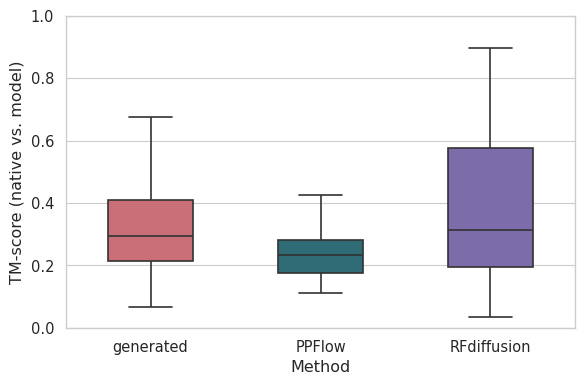

箱线图已保存: /root/autodl-tmp/PP_generate_v1/data/Diversity/TM-score_boxplot.png


In [26]:
# <!-- #!/usr/bin/env python
# coding: utf-8 -->
"""
Compare native peptide vs. three design methods (TM-score) and draw boxplot
"""

import os, json, glob, subprocess, re, sys
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 0. 路径配置
# ------------------------------------------------------------------
TMALIGN = "/root/autodl-tmp/PP_generate_v1/data/downloads/TMalign"   # TM-align 可执行
JSON_ID = "/root/autodl-tmp/PP_generate_v1/data/SOTA/peptides_sota.json"

PATHS = {
    "native"      : "/root/autodl-tmp/PP_generate_v1/data/PPDbench/{id}/peptide.pdb",
    "generated"   : "/root/autodl-tmp/peptides5/{id}.pdb",
    "PPFlow"      : "/root/autodl-tmp/ppflow5/{id}/0001.pdb",
    "RFdiffusion" : "/root/autodl-tmp/RFdiffusion_top5/{id}_1.pdb",
}

OUT_PLOT = "/root/autodl-tmp/PP_generate_v1/data/Diversity/TM-score_boxplot.png"

# ------------------------------------------------------------------
# 1. 取 TM-score 的函数
# ------------------------------------------------------------------
TM_RE = re.compile(r"TM-score\s*=\s*([0-1]\.\d{3,})")

def tm_score(pdb_1: str, pdb_2: str) -> float | None:
    """运行 TM-align 并返回第一条 TM-score (对 pdb_1 标准化)"""
    cmd = [TMALIGN, pdb_1, pdb_2]
    try:
        res = subprocess.run(cmd, capture_output=True, text=True, check=True)
    except subprocess.CalledProcessError as e:
        print(f"[err] TM-align failed on {pdb_1} vs {pdb_2}", file=sys.stderr)
        return None
    for line in res.stdout.splitlines():
        m = TM_RE.search(line)
        if m:
            return float(m.group(1))
    return None

# ------------------------------------------------------------------
# 2. 主循环
# ------------------------------------------------------------------
with open(JSON_ID) as f:
    ids = list(json.load(f).keys())

records = []
missing = []

for pid in tqdm(ids, desc="Processing IDs"):
    # 检查所有必需文件是否存在
    files = {k: v.format(id=pid) for k, v in PATHS.items()}
    if not all(Path(p).is_file() for p in files.values()):
        missing.append(pid)
        continue

    native_pdb = files.pop("native")

    for method, model_pdb in files.items():
        score = tm_score(native_pdb, model_pdb)
        if score is not None:
            records.append({"id": pid, "method": method, "tm_score": score})
        else:
            print(f"[warn] TM-score None for {pid} {method}", file=sys.stderr)

print(f"\n完成比对 {len(records)} 条；缺文件 {len(missing)} 个 ID")

# ------------------------------------------------------------------
# 3. 绘制箱线图
# ------------------------------------------------------------------
df = pd.DataFrame(records)
if df.empty:
    raise RuntimeError("No TM-score parsed, abort")

order   = ["generated", "PPFlow", "RFdiffusion"]
palette = ["#d95f6b", "#247482", "#7962b4"]

sns.set(style="whitegrid", context="paper", font_scale=1.2)
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(
    data=df, x="method", y="tm_score",
    order=order, palette=palette,
    ax=ax, width=.5, linewidth=1.2,
    showfliers=False                  # 不画离群点，可改 True
)

ax.set_xlabel("Method")
ax.set_ylabel("TM-score (native vs. model)")
ax.set_ylim(0, 1)                     # TM-score 范围 0–1
fig.tight_layout()

Path(OUT_PLOT).parent.mkdir(parents=True, exist_ok=True)
fig.savefig(OUT_PLOT, dpi=300)
plt.show()

print("箱线图已保存:", OUT_PLOT)


Processing:   0%|          | 0/133 [00:00<?, ?it/s]

Processing: 100%|██████████| 133/133 [00:00<00:00, 143.89it/s]
/tmp/ipykernel_2332/731255162.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



统计信息
天然肽缺失 : 0
TargetPep    缺失模型 0, RMSD计算失败 3
PPFlow       缺失模型 0, RMSD计算失败 0
RFdiffusion  缺失模型 0, RMSD计算失败 0


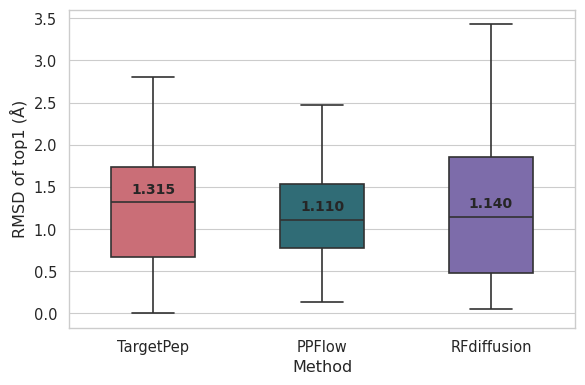

In [66]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''计算三种方法与天然肽RMSD top1 并绘制箱线图'''
import os, json, sys, re
from pathlib import Path
from tqdm import tqdm
import subprocess

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 0. 路径与模板
# ------------------------------------------------------------------
JSON_ID = "/root/autodl-tmp/PP_generate_v1/data/SOTA/peptides_sota.json"

PATH_TMPL = dict(
    native      = "/root/autodl-tmp/PP_generate_v1/data/PPDbench/{id}/peptide.pdb",
    TargetPep   = "/root/autodl-tmp/peptides5/{id}.pdb",
    PPFlow      = "/root/autodl-tmp/ppflow/{id}/0001.pdb",
    # PPFlow      = "/root/autodl-fs/codesignppflow/{id}/0001.pdb",
    RFdiffusion = "/root/autodl-tmp/RFdiffusion_top5/{id}_1.pdb",
)

# 你的 TM-align 可执行文件
TMALIGN = "/root/autodl-tmp/PP_generate_v1/data/downloads/TMalign"

OUT_PLOT = "/root/autodl-tmp/PP_generate_v1/data/Diversity/RMSD_top1_boxplot.png"

# ------------------------------------------------------------------
# 1. 用 TM-align 计算 RMSD
# ------------------------------------------------------------------
RMSD_RE = re.compile(r"\bRMSD[=\s]+([0-9.]+)")

def rmsd_tmalign(ref_pdb: str, model_pdb: str) -> float | None:
    """
    调 TM-align 计算两个 PDB 的 Cα RMSD。
    返回 float; 如 TM-align 失败或未解析到值则 None
    """
    cmd = [TMALIGN, model_pdb, ref_pdb]           # 顺序无关
    try:
        res = subprocess.run(cmd, capture_output=True, text=True, check=True)
    except subprocess.CalledProcessError as e:
        print(f"[ERR] TM-align failed on {model_pdb}: {e}", file=sys.stderr)
        return None

    for line in res.stdout.splitlines():
        m = RMSD_RE.search(line)
        if m:
            return float(m.group(1))              # Å
    print(f"[WARN] RMSD not found in TM-align output for {model_pdb}", file=sys.stderr)
    return None

# ------------------------------------------------------------------
# 2. 遍历所有 ID
# ------------------------------------------------------------------
with open(JSON_ID) as f:
    ids = list(json.load(f).keys())

records = []
missing_nat = []
missing_mod = {m: [] for m in ("TargetPep", "PPFlow", "RFdiffusion")}
rmsd_fail   = {m: [] for m in ("TargetPep", "PPFlow", "RFdiffusion")}

for pid in tqdm(ids, desc="Processing"):
    nat_pdb = PATH_TMPL["native"].format(id=pid)
    if not os.path.isfile(nat_pdb):
        missing_nat.append(pid)
        continue

    for method in ("TargetPep", "PPFlow", "RFdiffusion"):
        mod_pdb = PATH_TMPL[method].format(id=pid)
        if not os.path.isfile(mod_pdb):
            missing_mod[method].append(pid)
            continue

        score = rmsd_tmalign(nat_pdb, mod_pdb)
        if score is None:
            rmsd_fail[method].append(pid)
            continue
        records.append(dict(id=pid, method=method, rmsd=score))

# ------------------------------------------------------------------
# 3. 打印统计
# ------------------------------------------------------------------
print("\n统计信息")
print("天然肽缺失 :", len(missing_nat))
for m in ("TargetPep", "PPFlow", "RFdiffusion"):
    print(f"{m:12} 缺失模型 {len(missing_mod[m])}, RMSD计算失败 {len(rmsd_fail[m])}")

df = pd.DataFrame(records)
if df.empty:
    raise RuntimeError("没有 RMSD 数据，请检查文件路径或 TM-align 输出格式！")

# ------------------------------------------------------------------
# 4. 绘制箱线图
# ------------------------------------------------------------------
sns.set(style="whitegrid", context="paper", font_scale=1.2)

order   = ["TargetPep", "PPFlow", "RFdiffusion"]
palette = ['#d95f6b', '#247482', '#7962b4']

fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(
    data=df, x="method", y="rmsd",
    order=order, palette=palette,
    ax=ax, width=.5, linewidth=1.2, showfliers=False
)

# ====== ① 计算各组中位数 =====================================================
med_dict = df.groupby("method")["rmsd"].median()

# ====== ② 在箱体上方写数值 ===================================================
ylim    = ax.get_ylim()
y_shift = (ylim[1] - ylim[0]) * 0.02          # 2% 作为偏移，避免文字压线

for i, m in enumerate(order):
    y = med_dict[m]
    ax.text(i, y + y_shift, f"{y:.3f}",        # 保留 3 位小数，可改 .2f
            ha="center", va="bottom", fontsize=10, fontweight="bold")

ax.set_xlabel("Method")
ax.set_ylabel("RMSD of top1 (Å)")
fig.tight_layout()

# ------------------------------------------------------------------
# 保存与展示
# ------------------------------------------------------------------
Path(OUT_PLOT).parent.mkdir(parents=True, exist_ok=True)
fig.savefig(OUT_PLOT, dpi=300)
plt.show()



Processing: 100%|██████████| 133/133 [00:04<00:00, 28.30it/s]
/tmp/ipykernel_3170/3166788572.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



天然肽缺失 0 条；成功记录 399 条


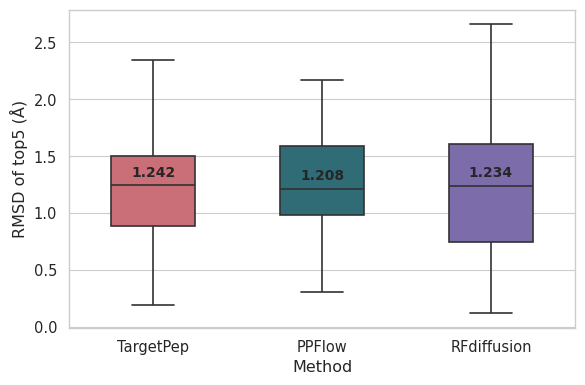

箱线图已保存: /root/autodl-tmp/PP_generate_v1/data/Diversity/RMSD_top5_boxplot.png


In [5]:
'''计算三种方法与天然肽RMSD并绘制箱线图(top5)'''

#!/usr/bin/env python
# -*- coding: utf-8 -*-
import os, json, sys, re, subprocess
from pathlib import Path
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 0. 路径
# ------------------------------------------------------------------
JSON_ID  = "/root/autodl-tmp/PP_generate_v1/data/SOTA/peptides_sota.json"
TMALIGN  = "/root/autodl-tmp/PP_generate_v1/data/downloads/TMalign"
OUT_PLOT = "/root/autodl-tmp/PP_generate_v1/data/Diversity/RMSD_top5_boxplot.png"

# 天然肽
NATIVE_TMPL = "/root/autodl-tmp/PP_generate_v1/data/PPDbench/{id}/peptide.pdb"

# 每种方法 5 个模型
def paths_generated(pid):
    return [f"/root/autodl-tmp/peptides{i}/{pid}.pdb" for i in range(1, 6)]

def paths_ppflow(pid):
    return [f"/root/autodl-tmp/ppflow/{pid}/000{i}.pdb" for i in range(1, 6)]

def paths_rfdiff(pid):
    return [f"/root/autodl-tmp/RFdiffusion_top5/{pid}_{i}.pdb" for i in range(1, 6)]

PATH_FUNCS = {
    "TargetPep"  : paths_generated,
    "PPFlow"     : paths_ppflow,
    "RFdiffusion": paths_rfdiff,
}

# ------------------------------------------------------------------
# 1. 解析 TM-align RMSD
# ------------------------------------------------------------------
RMSD_RE = re.compile(r"\bRMSD[=\s]+([0-9.]+)")

def tmalign_rmsd(ref_pdb, model_pdb):
    if not os.path.isfile(model_pdb):
        return None
    cmd = [TMALIGN, model_pdb, ref_pdb]
    try:
        res = subprocess.run(cmd, capture_output=True, text=True, check=True)
    except subprocess.CalledProcessError:
        return None
    for ln in res.stdout.splitlines():
        m = RMSD_RE.search(ln)
        if m:
            return float(m.group(1))
    return None

# ------------------------------------------------------------------
# 2. 遍历
# ------------------------------------------------------------------
with open(JSON_ID) as f:
    ids = list(json.load(f).keys())

records = []
missing_native = 0

for pid in tqdm(ids, desc="Processing"):
    nat_pdb = NATIVE_TMPL.format(id=pid)
    if not os.path.isfile(nat_pdb):
        missing_native += 1
        continue

    for method, fn in PATH_FUNCS.items():
        rmsd_vals = []
        for pdb_path in fn(pid):
            score = tmalign_rmsd(nat_pdb, pdb_path)
            if score is not None:
                rmsd_vals.append(score)

        if rmsd_vals:                          # 至少成功一次
            records.append({
                "id": pid,
                "method": method,
                "rmsd":  float(np.mean(rmsd_vals))  # 五个取均值
            })

print(f"\n天然肽缺失 {missing_native} 条；成功记录 {len(records)} 条")

df = pd.DataFrame(records)
if df.empty:
    sys.exit("没有 RMSD 数据，检查路径或 TM-align 输出")

# ------------------------------------------------------------------
# 3. 画箱线图并标中位数
# ------------------------------------------------------------------
sns.set(style="whitegrid", context="paper", font_scale=1.2)
order   = ["TargetPep", "PPFlow", "RFdiffusion"]
palette = ['#d95f6b', '#247482', '#7962b4']

fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(
    data=df, x="method", y="rmsd",
    order=order, palette=palette,
    ax=ax, width=.5, linewidth=1.2, showfliers=False
)

# 中位数数值写在箱体上
med = df.groupby("method")["rmsd"].median()
ymin, ymax = ax.get_ylim()
shift = (ymax - ymin) * 0.02
for i, m in enumerate(order):
    ax.text(i, med[m] + shift, f"{med[m]:.3f}",
            ha="center", va="bottom", fontsize=10, fontweight="bold")

ax.set_xlabel("Method")
ax.set_ylabel("RMSD of top5 (Å)")
fig.tight_layout()

Path(OUT_PLOT).parent.mkdir(parents=True, exist_ok=True)
fig.savefig(OUT_PLOT, dpi=300)
plt.show()
print("箱线图已保存:", OUT_PLOT)



Processing: 100%|██████████| 133/133 [00:02<00:00, 47.05it/s]
/tmp/ipykernel_3170/1055415197.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



天然肽缺失 0 条；成功记录 399 条


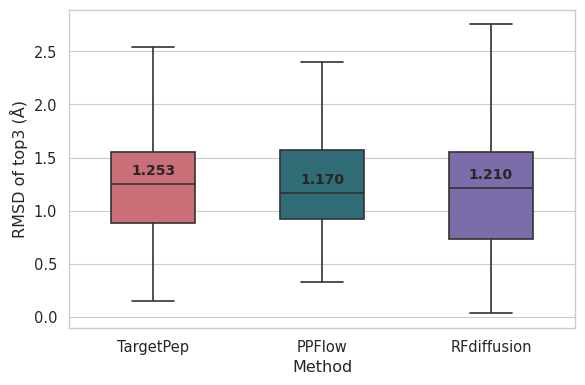

箱线图已保存: /root/autodl-tmp/PP_generate_v1/data/Diversity/RMSD_top3_boxplot.png


In [6]:
'''计算三种方法与天然肽RMSD并绘制箱线图(top3)'''

#!/usr/bin/env python
# -*- coding: utf-8 -*-
import os, json, sys, re, subprocess
from pathlib import Path
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 0. 路径
# ------------------------------------------------------------------
JSON_ID  = "/root/autodl-tmp/PP_generate_v1/data/SOTA/peptides_sota.json"
TMALIGN  = "/root/autodl-tmp/PP_generate_v1/data/downloads/TMalign"
OUT_PLOT = "/root/autodl-tmp/PP_generate_v1/data/Diversity/RMSD_top3_boxplot.png"

# 天然肽
NATIVE_TMPL = "/root/autodl-tmp/PP_generate_v1/data/PPDbench/{id}/peptide.pdb"

# 每种方法 5 个模型
def paths_generated(pid):
    return [f"/root/autodl-tmp/peptides{i}/{pid}.pdb" for i in range(3, 6)]

def paths_ppflow(pid):
    return [f"/root/autodl-tmp/ppflow/{pid}/000{i}.pdb" for i in range(1, 4)]

def paths_rfdiff(pid):
    return [f"/root/autodl-tmp/RFdiffusion_top5/{pid}_{i}.pdb" for i in range(1, 4)]

PATH_FUNCS = {
    "TargetPep"  : paths_generated,
    "PPFlow"     : paths_ppflow,
    "RFdiffusion": paths_rfdiff,
}

# ------------------------------------------------------------------
# 1. 解析 TM-align RMSD
# ------------------------------------------------------------------
RMSD_RE = re.compile(r"\bRMSD[=\s]+([0-9.]+)")

def tmalign_rmsd(ref_pdb, model_pdb):
    if not os.path.isfile(model_pdb):
        return None
    cmd = [TMALIGN, model_pdb, ref_pdb]
    try:
        res = subprocess.run(cmd, capture_output=True, text=True, check=True)
    except subprocess.CalledProcessError:
        return None
    for ln in res.stdout.splitlines():
        m = RMSD_RE.search(ln)
        if m:
            return float(m.group(1))
    return None

# ------------------------------------------------------------------
# 2. 遍历
# ------------------------------------------------------------------
with open(JSON_ID) as f:
    ids = list(json.load(f).keys())

records = []
missing_native = 0

for pid in tqdm(ids, desc="Processing"):
    nat_pdb = NATIVE_TMPL.format(id=pid)
    if not os.path.isfile(nat_pdb):
        missing_native += 1
        continue

    for method, fn in PATH_FUNCS.items():
        rmsd_vals = []
        for pdb_path in fn(pid):
            score = tmalign_rmsd(nat_pdb, pdb_path)
            if score is not None:
                rmsd_vals.append(score)

        if rmsd_vals:                          # 至少成功一次
            records.append({
                "id": pid,
                "method": method,
                "rmsd":  float(np.mean(rmsd_vals))  # 五个取均值
            })

print(f"\n天然肽缺失 {missing_native} 条；成功记录 {len(records)} 条")

df = pd.DataFrame(records)
if df.empty:
    sys.exit("没有 RMSD 数据，检查路径或 TM-align 输出")

# ------------------------------------------------------------------
# 3. 画箱线图并标中位数
# ------------------------------------------------------------------
sns.set(style="whitegrid", context="paper", font_scale=1.2)
order   = ["TargetPep", "PPFlow", "RFdiffusion"]
palette = ['#d95f6b', '#247482', '#7962b4']

fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(
    data=df, x="method", y="rmsd",
    order=order, palette=palette,
    ax=ax, width=.5, linewidth=1.2, showfliers=False
)

# 中位数数值写在箱体上
med = df.groupby("method")["rmsd"].median()
ymin, ymax = ax.get_ylim()
shift = (ymax - ymin) * 0.02
for i, m in enumerate(order):
    ax.text(i, med[m] + shift, f"{med[m]:.3f}",
            ha="center", va="bottom", fontsize=10, fontweight="bold")

ax.set_xlabel("Method")
ax.set_ylabel("RMSD of top3 (Å)")
fig.tight_layout()

Path(OUT_PLOT).parent.mkdir(parents=True, exist_ok=True)
fig.savefig(OUT_PLOT, dpi=300)
plt.show()
print("箱线图已保存:", OUT_PLOT)



     id     method  identity
0  1cjr  TargetPep       5.9
1  1cka  TargetPep      20.0
2  1cvu  TargetPep       2.7
3  1d4t  TargetPep       0.0
4  1eg4  TargetPep       8.8


/tmp/ipykernel_2332/2550717376.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


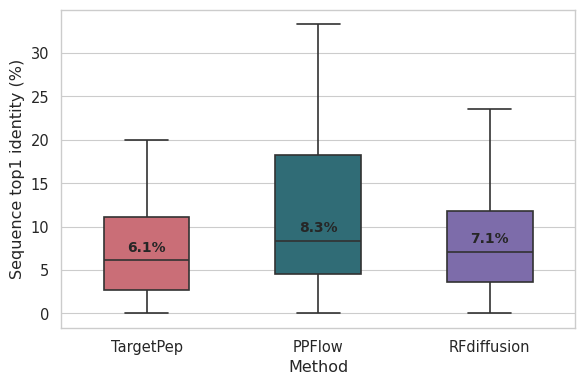

箱线图已保存到: /root/autodl-tmp/PP_generate_v1/data/Diversity/needle_top1_boxplot.png


In [65]:
"""
把三份 needle 结果画成箱线图(top1)
"""

import os, re, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1️⃣  配置：3 个文件夹路径（改成你的）
# -------------------------------------------------------------
FOLDERS = {
    "TargetPep"   : "/root/autodl-tmp/PP_generate_v1/data/Diversity/nat_vs_gen1",      # 天然 vs 生成
    "PPFlow"      : "/root/autodl-tmp/PP_generate_v1/data/Diversity/nat_vs_ppflow1",         # 天然 vs PPFlow
    "RFdiffusion" : "/root/autodl-tmp/PP_generate_v1/data/Diversity/nat_vs_RFdiffusion1"     # 天然 vs RFdiff
}

# -------------------------------------------------------------
# 2️⃣  解析函数：抓 Identity 百分比
# -------------------------------------------------------------
IDENTITY_RE = re.compile(r"Identity:\s+\d+/\d+\s+\(\s*([\d\.]+)\s*%\)")

def parse_identity(needle_path: str) -> float | None:
    with open(needle_path) as fh:
        for line in fh:
            m = IDENTITY_RE.search(line)
            if m:
                return float(m.group(1))
    return None   # 若文件缺失该行

# -------------------------------------------------------------
# 3️⃣  收集数据
# -------------------------------------------------------------
rows = []
for label, folder in FOLDERS.items():
    if not os.path.isdir(folder):
        raise FileNotFoundError(f"目录不存在: {folder}")
    for path in glob.glob(os.path.join(folder, "*.needle")):
        id_ = os.path.splitext(os.path.basename(path))[0]
        pid = parse_identity(path)
        if pid is None:
            print(f"[warn] {path} 无 Identity 行，跳过")
            continue
        rows.append({"id": id_, "method": label, "identity": pid})

df = pd.DataFrame(rows)
if df.empty:
    raise RuntimeError("没有解析到任何 Identity 百分比，请检查路径和文件")

print(df.head())

# -------------------------------------------------------------
# 4️⃣  绘制箱线图
# -------------------------------------------------------------
order   = ["TargetPep", "PPFlow", "RFdiffusion"]
palette = ['#d95f6b', '#247482', '#7962b4']

sns.set(style="whitegrid", context="paper", font_scale=1.2)
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(
    data=df, x="method", y="identity",
    order=order, palette=palette,
    ax=ax, width=0.5, linewidth=1.2,
    showfliers=False            # 不显示离群点；如需保留改为 True
)
# ===== 新增：计算并标注中位数 ======================================
medians = df.groupby("method")["identity"].median()   # ① 每组中位数
ymin, ymax = ax.get_ylim()
shift = (ymax - ymin) * 0.02                         # ② 向上偏 2%

for i, m in enumerate(order):
    y = medians[m]
    ax.text(i, y + shift, f"{y:.1f}%",               # ③ 保留 1 位小数
            ha="center", va="bottom",
            fontsize=10, fontweight="bold")
ax.set_xlabel("Method")
ax.set_ylabel("Sequence top1 identity (%)")
fig.tight_layout()

out_png = "/root/autodl-tmp/PP_generate_v1/data/Diversity/needle_top1_boxplot.png"
fig.savefig(out_png, dpi=300)
plt.show()

print("箱线图已保存到:", out_png)

/tmp/ipykernel_2332/331012618.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


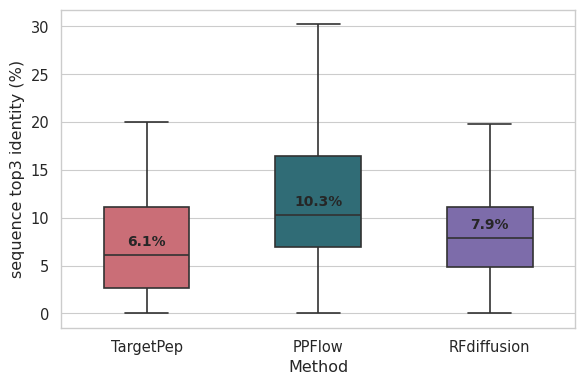

箱线图已保存: /root/autodl-tmp/PP_generate_v1/data/Diversity/needle_top3_boxplot.png


In [62]:
import os, re, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
''' 把三份 needle 结果画成箱线图(top3)'''
# -------------------------------------------------------------
# 1️⃣  三种方法各 5 个批次文件夹
# -------------------------------------------------------------
FOLDER_GROUPS = {
    "TargetPep":   [f"/root/autodl-tmp/PP_generate_v1/data/Diversity/nat_vs_gen{i}"        for i in range(1, 4)],
    "PPFlow":      [f"/root/autodl-tmp/PP_generate_v1/data/Diversity/nat_vs_ppflow{i}"     for i in range(3, 6)],
    "RFdiffusion": [f"/root/autodl-tmp/PP_generate_v1/data/Diversity/nat_vs_RFdiffusion{i}"for i in range(1, 4)],
}

# -------------------------------------------------------------
# 2️⃣  解析 needle Identity(%)
# -------------------------------------------------------------
IDENTITY_RE = re.compile(r"Identity:\s+\d+/\d+\s+\(\s*([\d\.]+)\s*%\)")

def parse_identity(path):
    with open(path) as fh:
        for ln in fh:
            m = IDENTITY_RE.search(ln)
            if m:
                return float(m.group(1))
    return None

# -------------------------------------------------------------
# 3️⃣  收集并按 ID 求均值
# -------------------------------------------------------------
data = defaultdict(lambda: defaultdict(list))   # data[id][method] -> list[identity]

for method, folders in FOLDER_GROUPS.items():
    for folder in folders:
        if not os.path.isdir(folder):
            raise FileNotFoundError(folder)
        for path in glob.glob(os.path.join(folder, "*.needle")):
            pid = os.path.splitext(os.path.basename(path))[0]   # 例如 1cka
            val = parse_identity(path)
            if val is not None:
                data[pid][method].append(val)

rows = []
for pid, m_dict in data.items():
    for method, vals in m_dict.items():
        if vals:                             # 该方法在 5 批里至少成功一次
            rows.append({
                "id": pid,
                "method": method,
                "identity": sum(vals) / len(vals)   # ← 取均值
            })

df = pd.DataFrame(rows)
if df.empty:
    raise RuntimeError("没有解析到任何 Identity 数据，请检查文件")

# -------------------------------------------------------------
# 4️⃣  绘制箱线图 + 中位数标签
# -------------------------------------------------------------
order   = ["TargetPep", "PPFlow", "RFdiffusion"]
palette = ['#d95f6b', '#247482', '#7962b4']

sns.set(style="whitegrid", context="paper", font_scale=1.2)
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(
    data=df, x="method", y="identity",
    order=order, palette=palette,
    ax=ax, width=.5, linewidth=1.2, showfliers=False
)

# 标中位数
med = df.groupby("method")["identity"].median()
ymin, ymax = ax.get_ylim()
shift = (ymax - ymin) * 0.02
for i, m in enumerate(order):
    ax.text(i, med[m] + shift, f"{med[m]:.1f}%",
            ha="center", va="bottom", fontsize=10, fontweight="bold")

ax.set_xlabel("Method")
ax.set_ylabel("sequence top3 identity (%)")
fig.tight_layout()

out_png = "/root/autodl-tmp/PP_generate_v1/data/Diversity/needle_top3_boxplot.png"
os.makedirs(os.path.dirname(out_png), exist_ok=True)
fig.savefig(out_png, dpi=300)
plt.show()
print("箱线图已保存:", out_png)

/tmp/ipykernel_2332/4227182870.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


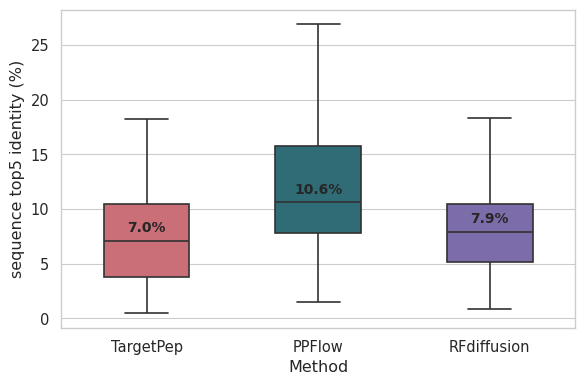

箱线图已保存: /root/autodl-tmp/PP_generate_v1/data/Diversity/needle_top5_boxplot.png


In [64]:
import os, re, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
''' 把三份 needle 结果画成箱线图(top5)'''
# -------------------------------------------------------------
# 1️⃣  三种方法各 5 个批次文件夹
# -------------------------------------------------------------
FOLDER_GROUPS = {
    "TargetPep":   [f"/root/autodl-tmp/PP_generate_v1/data/Diversity/nat_vs_gen{i}"        for i in range(1, 6)],
    "PPFlow":      [f"/root/autodl-tmp/PP_generate_v1/data/Diversity/nat_vs_ppflow{i}"     for i in range(1, 6)],
    "RFdiffusion": [f"/root/autodl-tmp/PP_generate_v1/data/Diversity/nat_vs_RFdiffusion{i}"for i in range(1, 6)],
}

# -------------------------------------------------------------
# 2️⃣  解析 needle Identity(%)
# -------------------------------------------------------------
IDENTITY_RE = re.compile(r"Identity:\s+\d+/\d+\s+\(\s*([\d\.]+)\s*%\)")

def parse_identity(path):
    with open(path) as fh:
        for ln in fh:
            m = IDENTITY_RE.search(ln)
            if m:
                return float(m.group(1))
    return None

# -------------------------------------------------------------
# 3️⃣  收集并按 ID 求均值
# -------------------------------------------------------------
data = defaultdict(lambda: defaultdict(list))   # data[id][method] -> list[identity]

for method, folders in FOLDER_GROUPS.items():
    for folder in folders:
        if not os.path.isdir(folder):
            raise FileNotFoundError(folder)
        for path in glob.glob(os.path.join(folder, "*.needle")):
            pid = os.path.splitext(os.path.basename(path))[0]   # 例如 1cka
            val = parse_identity(path)
            if val is not None:
                data[pid][method].append(val)

rows = []
for pid, m_dict in data.items():
    for method, vals in m_dict.items():
        if vals:                             # 该方法在 5 批里至少成功一次
            rows.append({
                "id": pid,
                "method": method,
                "identity": sum(vals) / len(vals)   # ← 取均值
            })

df = pd.DataFrame(rows)
if df.empty:
    raise RuntimeError("没有解析到任何 Identity 数据，请检查文件")

# -------------------------------------------------------------
# 4️⃣  绘制箱线图 + 中位数标签
# -------------------------------------------------------------
order   = ["TargetPep", "PPFlow", "RFdiffusion"]
palette = ['#d95f6b', '#247482', '#7962b4']

sns.set(style="whitegrid", context="paper", font_scale=1.2)
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(
    data=df, x="method", y="identity",
    order=order, palette=palette,
    ax=ax, width=.5, linewidth=1.2, showfliers=False
)

# 标中位数
med = df.groupby("method")["identity"].median()
ymin, ymax = ax.get_ylim()
shift = (ymax - ymin) * 0.02
for i, m in enumerate(order):
    ax.text(i, med[m] + shift, f"{med[m]:.1f}%",
            ha="center", va="bottom", fontsize=10, fontweight="bold")

ax.set_xlabel("Method")
ax.set_ylabel("sequence top5 identity (%)")
fig.tight_layout()

out_png = "/root/autodl-tmp/PP_generate_v1/data/Diversity/needle_top5_boxplot.png"
os.makedirs(os.path.dirname(out_png), exist_ok=True)
fig.savefig(out_png, dpi=300)
plt.show()
print("箱线图已保存:", out_png)